<a href="https://colab.research.google.com/github/georgegatanas/Mini-Python-Project/blob/main/COVID_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

Import Pandas (using the code "import pandas as pd"), then import the csv files of the data to be used. My files were saved in my google drive, so they were imported from my local drive with the command below. The os (operating system) is also imported, as it is important in providing underlying fucntions that help the user input their data/equations smoothly to get a nice output.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
FOLDER_NAME = "/content/drive/My Drive/Cooper Union S1/Comp Programming for Eng"

In [4]:
FILE_NAME = "new-york-history.csv"

In [5]:
OUTPUT_NAME = "death-counts.csv"

In [6]:
PLOT_NAME = "cumulative-counts.png"

Each file is divided in order to manipulate each variable (date and death count) in the code, and eventually join their paths. 

In [7]:
COLUMNS = [
    "date",
    "state",
    "death"
]

In [8]:
df = pd.read_csv(os.path.join(FOLDER_NAME, FILE_NAME))

In [9]:
df = df[COLUMNS]

In [10]:
print(df.head())

         date state    death
0  2021-03-07    NY  39029.0
1  2021-03-06    NY  38970.0
2  2021-03-05    NY  38891.0
3  2021-03-04    NY  38796.0
4  2021-03-03    NY  38735.0


In [11]:
print(df.columns)

Index(['date', 'state', 'death'], dtype='object')


In [12]:
df["date"] = pd.to_datetime(df["date"])

In [13]:
input_dates = input("Input dates of Total COVID death count in NY: ").split()

Input dates of Total COVID death count in NY: 11/1/2020 12/1/2020 1/1/2021 2/1/2021 3/1/2021


In [14]:
input_dates = pd.to_datetime(input_dates)

In [15]:
df_in_dates = df.loc[df["date"].isin(input_dates)].sort_values(by="date")

In [16]:
print(df_in_dates.head())

          date state    death
126 2020-11-01    NY  25824.0
96  2020-12-01    NY  26816.0
65  2021-01-01    NY  30208.0
34  2021-02-01    NY  35319.0
6   2021-03-01    NY  38577.0


In [17]:
df_in_dates.to_csv(os.path.join(FOLDER_NAME, OUTPUT_NAME))

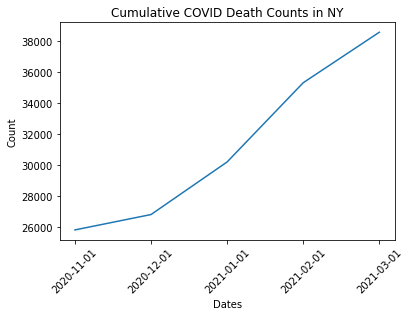

In [19]:
plt.figure()
plt.plot(df_in_dates["death"].values)
plt.title("Cumulative COVID Death Counts in NY")
plt.xlabel("Dates")
plt.ylabel("Count")
plt.xticks(ticks=range(len(input_dates)), labels=input_dates.date, rotation=45)
plt.savefig(os.path.join(FOLDER_NAME, PLOT_NAME), bbox_inches="tight")
plt.show()